## 1. Setup and Data

#### 1.1 Install lib

In [2]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Adarsh\AppData\Local\Temp\pip-install-pqooxz2f\tensorflow-gpu_d6f8854161434c7fb1cc6af68c108c76\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did no

#### 1.2 Collect images using Opencv

In [4]:
import os
import time # to detect even is we move around
import uuid # for unique identity
import cv2

In [5]:
uuid.uuid1() # prevents using image 1, image2 and so on

UUID('be185c46-3c04-11ee-a865-70a8d31acf47')

#### 1.3 Annotate Images with labelme

In [10]:
IMAGE_PATH = os.path.join('data', 'images')  #inside data, inside folder images
number_img = 30

In [11]:
for image_num in range(30):
    print(image_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [18]:
cap = cv2.VideoCapture(0)

for imgnum in range(number_img):
    print('Collecting image {} '.format(imgnum))
    ret, frame = cap.read()

    # Resize the captured frame to 450x450 pixels
    resized_frame = cv2.resize(frame, (550, 450))

    imgname = os.path.join(IMAGE_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, resized_frame)
    cv2.imshow('frame', resized_frame)
    time.sleep(1.0)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

    

In [20]:
!pip install pyqt5
!pip install labelme


In [22]:
!labelme


[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\Adarsh\.labelmerc


## 2. Review dataset and build image loading function

##### 2.1 Import TF and Deps

In [23]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

##### 2.2 Limiting GPU memory growth

In [24]:
# Avoid OOM errors by setting GPU Memory Consumption growth
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [25]:
!pip install jupyterlab tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Adarsh\AppData\Local\Temp\pip-install-u0dx30c3\tensorflow-gpu_5ac56e5d8ef7477299861ad68895d882\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did no

In [26]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

##### 2.3 Load images into TF data pipeline

In [40]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = False)

In [41]:
images.as_numpy_iterator().next()

b'data\\images\\6452b25d-3c13-11ee-a218-70a8d31acf47.jpg'

In [42]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img


In [43]:
images = images.map(load_image)

In [44]:
images.as_numpy_iterator().next()

array([[[ 58,  64,  50],
        [ 58,  64,  50],
        [ 59,  65,  51],
        ...,
        [154, 149, 127],
        [152, 147, 125],
        [149, 144, 122]],

       [[ 59,  65,  51],
        [ 59,  65,  51],
        [ 59,  65,  51],
        ...,
        [152, 147, 125],
        [152, 147, 125],
        [149, 144, 122]],

       [[ 59,  65,  51],
        [ 59,  65,  51],
        [ 59,  65,  51],
        ...,
        [151, 146, 126],
        [151, 146, 126],
        [149, 144, 124]],

       ...,

       [[ 32,  37,  41],
        [ 31,  36,  40],
        [ 30,  35,  41],
        ...,
        [ 21,  21,  19],
        [ 22,  22,  20],
        [ 23,  23,  21]],

       [[ 31,  36,  42],
        [ 30,  35,  41],
        [ 30,  35,  41],
        ...,
        [ 25,  27,  26],
        [ 24,  26,  25],
        [ 24,  26,  25]],

       [[ 32,  37,  43],
        [ 31,  36,  42],
        [ 31,  36,  42],
        ...,
        [ 27,  29,  28],
        [ 25,  27,  26],
        [ 25,  27,  26]]

In [45]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

##### 2.4 View raw images with matplotlib

In [46]:
image_generator = images.batch(4).as_numpy_iterator()   # returns images in batch of 4

In [47]:
plot_images = image_generator.next() # next to get next batch

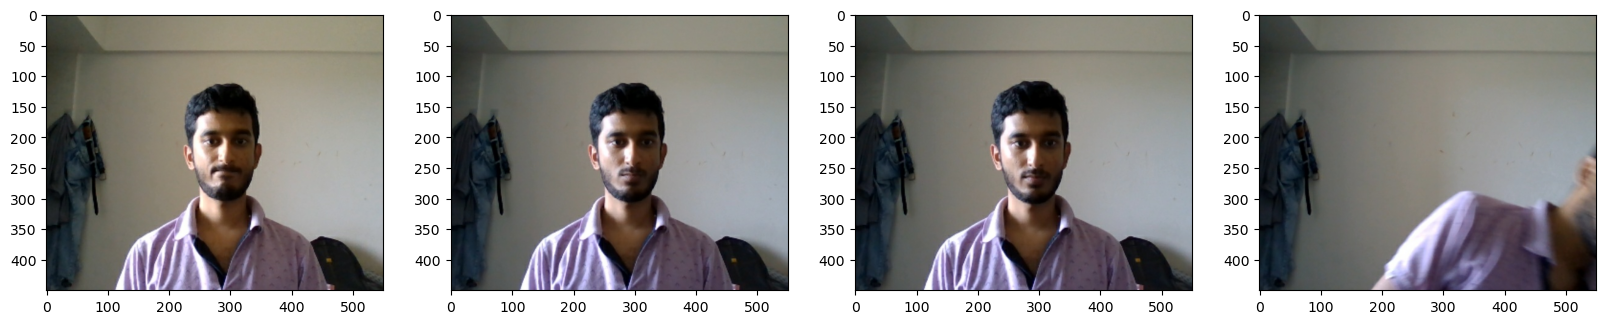

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

## 3. Partition Unaugmented Data

##### 3.1 Manually spli data into train, test and validation 

###### Move and match labels

In [51]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

### 4. Apply image augmentation on images and labels using albumentations 

##### setup albumentations

In [52]:
import albumentations as alb


In [53]:
augmentor = alb.Compose([alb.RandomCrop(width=288, height=288),  #RandomCrop is the trickiest thing to handle
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5),
                        ],  #VerticalFlip is the trickiest thing to handle
                         bbox_params = alb.BboxParams(format='albumentations',
                                                      label_fields=['class_labels']),
                       )

In [70]:
img = cv2.imread(os.path.join('data', 'train', 'images', 'd441c158-3c14-11ee-bd77-70a8d31acf47.jpg'))
img

array([[[ 52,  62,  50],
        [ 52,  62,  50],
        [ 56,  61,  52],
        ...,
        [110, 122, 122],
        [110, 122, 122],
        [110, 122, 122]],

       [[ 51,  61,  49],
        [ 52,  62,  50],
        [ 55,  60,  51],
        ...,
        [109, 121, 121],
        [110, 122, 122],
        [109, 121, 121]],

       [[ 51,  60,  50],
        [ 51,  60,  50],
        [ 54,  59,  50],
        ...,
        [108, 121, 123],
        [109, 121, 123],
        [108, 120, 122]],

       ...,

       [[ 36,  29,  20],
        [ 35,  28,  19],
        [ 34,  27,  18],
        ...,
        [ 74,  49,  39],
        [ 92,  64,  53],
        [106,  77,  63]],

       [[ 34,  28,  21],
        [ 33,  27,  20],
        [ 32,  26,  19],
        ...,
        [ 76,  48,  41],
        [ 91,  62,  53],
        [105,  75,  64]],

       [[ 32,  29,  21],
        [ 31,  28,  20],
        [ 32,  26,  19],
        ...,
        [ 76,  48,  41],
        [ 91,  62,  55],
        [105,  74,  65]]

In [71]:
with open(os.path.join('data', 'train', 'labels', 'd441c158-3c14-11ee-bd77-70a8d31acf47.json'), 'r') as f:
    label = json.load(f)

In [72]:
type(label)

dict

In [73]:
type(label['shapes'])

list

In [74]:
label['shapes'][0]

{'label': 'face',
 'points': [[255.08130081300814, 80.28455284552845],
  [427.4390243902439, 329.8780487804878]],
 'group_id': None,
 'description': '',
 'shape_type': 'rectangle',
 'flags': {}}

#### 4.2 Extract coordinates and rescale to match image resolution

In [75]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [76]:
coords

[255.08130081300814, 80.28455284552845, 427.4390243902439, 329.8780487804878]

In [77]:
coords = list(np.divide(coords, [640, 480, 640, 480]))
coords

[0.3985645325203252,
 0.16725948509485095,
 0.6678734756097561,
 0.6872459349593496]

In [78]:
class_labels = ['face']

##### 4.3 Apply augmentations

In [79]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=class_labels)
augmented

{'image': array([[[140, 146, 145],
         [140, 146, 145],
         [140, 146, 145],
         ...,
         [111, 127, 134],
         [112, 125, 133],
         [112, 125, 133]],
 
        [[141, 147, 146],
         [141, 147, 146],
         [141, 147, 146],
         ...,
         [114, 128, 134],
         [116, 128, 134],
         [115, 127, 133]],
 
        [[141, 147, 146],
         [141, 147, 146],
         [141, 147, 146],
         ...,
         [115, 127, 133],
         [115, 127, 133],
         [115, 127, 133]],
 
        ...,
 
        [[ 98, 102, 107],
         [ 93,  96, 104],
         [ 88,  93, 102],
         ...,
         [  8,   3,   2],
         [  6,   1,   0],
         [  4,   0,   0]],
 
        [[ 92,  95, 103],
         [ 86,  91, 100],
         [ 84,  89,  98],
         ...,
         [  9,   4,   3],
         [  7,   2,   1],
         [  4,   0,   0]],
 
        [[ 84,  90,  97],
         [ 79,  86,  95],
         [ 78,  84,  95],
         ...,
         [  9,   4,

In [80]:
augmented['bboxes']

[(0.5474638486619242, 0.0, 1.0, 0.6328495511517614)]

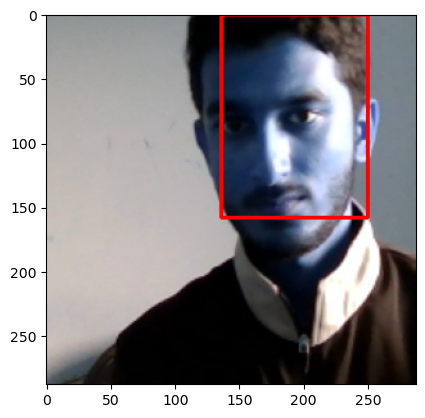

In [81]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [250,250]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [250,250]).astype(int)),
                  (255,0,0), 2)
plt.imshow(augmented['image'])

In [83]:
img.shape

(450, 550, 3)

## 5. Build and run augmentation Pipeline

##### 5.1 Run Augmentation Pipeline

In [86]:
""""for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))
        
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label=json.load(f)
                
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640, 480, 640, 480]))  # these poinst might cause problem
                          
        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                          
                annotation={}
                annotation['image']=image
                          
                if os.path.exists(label_path):
                    if len(augmented['bboxes'])== 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class']=0
                                  
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class']=1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class']=0
                          
                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)
        except Exception as e:
                          print(e)
                          """""

'"for partition in [\'train\', \'test\', \'val\']:\n    for image in os.listdir(os.path.join(\'data\', partition, \'images\')):\n        img = cv2.imread(os.path.join(\'data\', partition, \'images\', image))\n        \n        coords = [0, 0, 0.00001, 0.00001]\n        label_path = os.path.join(\'data\', partition, \'labels\', f\'{image.split(".")[0]}.json\')\n        if os.path.exists(label_path):\n            with open(label_path, \'r\') as f:\n                label=json.load(f)\n                \n            coords[0] = label[\'shapes\'][0][\'points\'][0][0]\n            coords[1] = label[\'shapes\'][0][\'points\'][0][1]\n            coords[2] = label[\'shapes\'][0][\'points\'][1][0]\n            coords[3] = label[\'shapes\'][0][\'points\'][1][1]\n            coords = list(np.divide(coords, [640, 480, 640, 480]))  # these poinst might cause problem\n                          \n        try:\n            for x in range(60):\n                augmented = augmentor(image=img, bboxes=[coo

In [90]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
x_max is less than or equal to x_min for bbox [0.2766133130081301, 0.311229674796748, 0.0034933943089430902, 0.7753218157181572, 'face'].
x_max is less than or equal to x_min for bbox [0.5649771341463415, 0.63135162601626, 0.24086079137863567, 0.0, 'face'].


In [97]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [98]:
test_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images=test_images.map(lambda x:x/255)

In [99]:
val_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x: tf.image.resize(x, (120, 120)))
val_images=val_images.map(lambda x:x/255)

In [100]:
train_images.as_numpy_iterator().next()

array([[[0.60227454, 0.59050983, 0.5552157 ],
        [0.6033726 , 0.5876863 , 0.55160785],
        [0.60588235, 0.5862745 , 0.5411765 ],
        ...,
        [0.3392157 , 0.35882354, 0.33137256],
        [0.3290194 , 0.35568628, 0.32470578],
        [0.3277647 , 0.35521567, 0.3277647 ]],

       [[0.60090196, 0.5895294 , 0.5530588 ],
        [0.60431373, 0.58862746, 0.55184317],
        [0.6072549 , 0.5862745 , 0.54490197],
        ...,
        [0.34058824, 0.35941178, 0.33117646],
        [0.34164703, 0.36117646, 0.33364707],
        [0.32901952, 0.35568622, 0.3247058 ]],

       [[0.6039216 , 0.5921569 , 0.5470588 ],
        [0.60568625, 0.59      , 0.54725486],
        [0.59607846, 0.5803922 , 0.5411765 ],
        ...,
        [0.35784313, 0.36764705, 0.33333334],
        [0.35137245, 0.36666667, 0.33490205],
        [0.3399999 , 0.36156857, 0.3282352 ]],

       ...,

       [[0.3082353 , 0.24745098, 0.3082353 ],
        [0.3156863 , 0.25431374, 0.31529412],
        [0.34117648, 0

## 6. Prepare Labels

##### 6.1 Build label loading function

In [102]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

##### 6.2 load data to tensorflow dataset



In [103]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [104]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [105]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [106]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.1353, 0.    , 0.5645, 0.589 ], dtype=float16))

## 7. Combine label and images samples

##### 7.1 Check partition length

In [108]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3660, 3660, 3660, 840, 3660, 780)

In [109]:
train=tf.data.Dataset.zip((train_images, train_labels))
train=train.shuffle(5000)
train=train.batch(8)
train=train.prefetch(4)

In [110]:
test=tf.data.Dataset.zip((test_images, test_labels))
test=test.shuffle(1300)
test=test.batch(8)
test=test.prefetch(4)

In [111]:
val=tf.data.Dataset.zip((val_images, val_labels))
val=val.shuffle(1000)
val=val.batch(8)
val=val.prefetch(4)

In [112]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.694 , 0.2366, 1.    , 1.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.522 , 0.32  , 1.    ],
        [0.048 , 0.    , 0.713 , 0.467 ],
        [0.    , 0.1365, 0.4453, 0.904 ],
        [0.313 , 0.189 , 0.7935, 0.9565],
        [0.38  , 0.    , 0.9863, 0.7876],
        [0.    , 0.1742, 0.1665, 0.873 ]], dtype=float16))

##### 7.3 View images and annotations

In [114]:
data_samples = train.as_numpy_iterator()

In [115]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


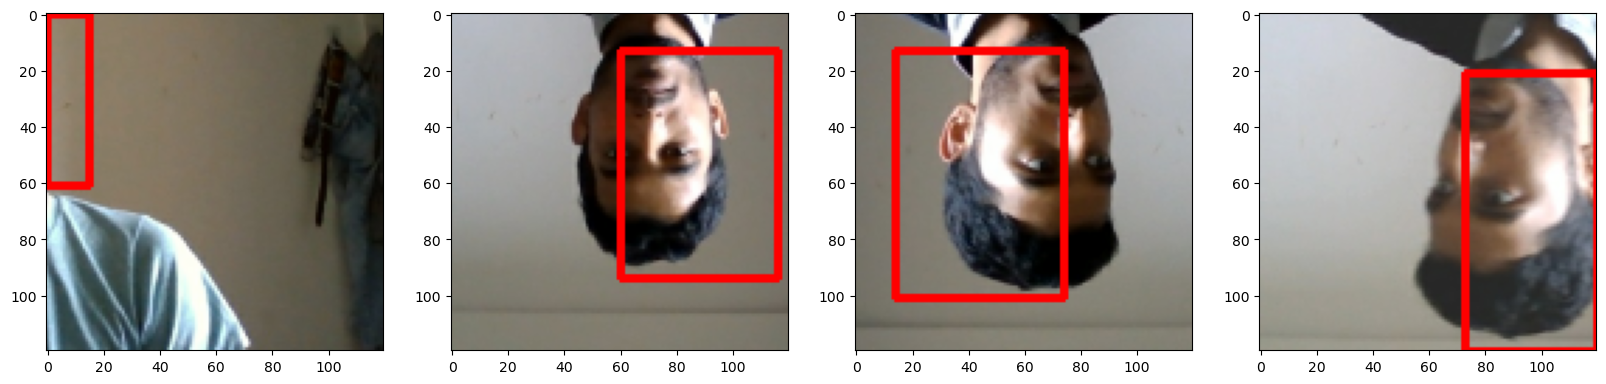

In [116]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                  (255, 0, 0), 2)
    ax[idx].imshow(sample_image)

## 8. Deep learning using the functional API

##### 8.1 import layers 

In [117]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16


##### 8.2 Download VGG16

In [118]:
vgg = VGG16(include_top=False)

In [119]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

##### 8.2 Building instance of network

In [120]:
def build_model():
    input_layer = Input(shape=(120, 120, 3))
    vgg = VGG16(include_top=False)(input_layer)
    #classification model
    f1=GlobalMaxPooling2D()(vgg)
    class1=Dense(2048, activation='relu')(f1)
    class2=Dense(1, activation='sigmoid')(class1)
    
    #bounding box model
    f2=GlobalMaxPooling2D()(vgg)
    regress1=Dense(2048, activation='relu')(f2)
    regress2=Dense(4, activation='sigmoid')(regress1)
    
    facetracker=Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [121]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1]], dtype=uint8),
 array([[0.4883 , 0.     , 1.     , 0.406  ],
        [0.01313, 0.1411 , 0.53   , 0.951  ],
        [0.4966 , 0.533  , 0.885  , 1.     ],
        [0.2627 , 0.409  , 0.772  , 1.     ],
        [0.     , 0.     , 0.3945 , 0.6167 ],
        [0.2428 , 0.4128 , 0.7935 , 1.     ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.4778 , 0.618  , 1.     , 1.     ]], dtype=float16))

In [122]:
facetracker=build_model()

In [123]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [124]:
X, y = train.as_numpy_iterator().next()

In [125]:
X.shape

(8, 120, 120, 3)

In [126]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.311 , 0.2385, 0.885 , 0.985 ],
        [0.8364, 0.3262, 1.    , 1.    ],
        [0.239 , 0.    , 0.904 , 0.8145],
        [0.405 , 0.1033, 0.9146, 0.863 ],
        [0.19  , 0.291 , 0.7554, 1.    ],
        [0.4329, 0.    , 0.964 , 0.4546],
        [0.2688, 0.    , 0.7856, 0.534 ],
        [0.5913, 0.3008, 1.    , 1.    ]], dtype=float16))

In [127]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 887ms/step


In [128]:
classes, coords

(array([[0.5207978 ],
        [0.5135356 ],
        [0.53163326],
        [0.54038566],
        [0.5489435 ],
        [0.5629451 ],
        [0.5395538 ],
        [0.45495912]], dtype=float32),
 array([[0.50368655, 0.59461737, 0.641088  , 0.84361833],
        [0.5338404 , 0.6379984 , 0.58573353, 0.7684032 ],
        [0.52764547, 0.59948796, 0.6035628 , 0.85333145],
        [0.47107843, 0.59870523, 0.66755277, 0.87002134],
        [0.5708126 , 0.6081573 , 0.6520823 , 0.84132063],
        [0.49128765, 0.6967502 , 0.59675896, 0.8265063 ],
        [0.4380156 , 0.62832826, 0.6777814 , 0.8254509 ],
        [0.5393127 , 0.62340635, 0.5950639 , 0.8092432 ]], dtype=float32))

## 9. Define losses and Optimizers

##### 9.1 Define Optimizer and LR

In [129]:
len(train)

458

In [135]:
batches_per_epoch = len(train)
lr_decay = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.0001,
    decay_steps=batches_per_epoch,
    decay_rate=0.75
)

opt = tf.keras.optimizers.Adam(learning_rate=lr_decay)

##### 9.2 Create localization and classification loss

In [136]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))
    
    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]
    
    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size

In [137]:
classloss=tf.keras.losses.BinaryCrossentropy()
regressloss=localization_loss

##### 9.3 Test loss metrics

In [138]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.3793006>

In [139]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6431243>

In [140]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.3793006>

## 10. Train Neural networks

##### 10.1 Create custom model class

In [143]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [144]:
model=FaceTracker(facetracker)

In [145]:
model.compile(opt, classloss, regressloss)

##### 10.2 Train

In [146]:
logdir = 'logs'

In [147]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [149]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
458/458 [==============================] - 539s 1s/step - total_loss: 0.1463 - class_loss: 0.0319 - regress_loss: 0.1303 - val_total_loss: 2.1420 - val_class_loss: 0.8979 - val_regress_loss: 1.6931
Epoch 2/10
458/458 [==============================] - 614s 1s/step - total_loss: 0.0955 - class_loss: 0.0195 - regress_loss: 0.0857 - val_total_loss: 2.0532 - val_class_loss: 1.0967 - val_regress_loss: 1.5048
Epoch 3/10
458/458 [==============================] - 624s 1s/step - total_loss: 0.0690 - class_loss: 0.0135 - regress_loss: 0.0622 - val_total_loss: 5.0154 - val_class_loss: 5.8133 - val_regress_loss: 2.1087
Epoch 4/10
458/458 [==============================] - 893s 2s/step - total_loss: 0.0508 - class_loss: 0.0097 - regress_loss: 0.0459 - val_total_loss: 1.5238 - val_class_loss: 8.1570e-04 - val_regress_loss: 1.5234
Epoch 5/10
458/458 [==============================] - 929s 2s/step - total_loss: 0.0494 - class_loss: 0.0093 - regress_loss: 0.0447 - val_total_loss: 0.5276 - v

In [150]:
hist.history

{'total_loss': [0.027210000902414322,
  0.012030140496790409,
  0.03925134614109993,
  0.0060648988001048565,
  0.009464932605624199,
  0.010407278314232826,
  0.0064612203277647495,
  0.00467824749648571,
  0.004657129291445017,
  0.0062660034745931625],
 'class_loss': [0.00020521147234831005,
  5.396009510150179e-05,
  7.286708296305733e-06,
  3.931039827875793e-05,
  9.596451491233893e-06,
  3.68060682376381e-06,
  1.505020236436394e-06,
  3.5017960726690944e-06,
  8.344664479409403e-07,
  0.002352686133235693],
 'regress_loss': [0.027107395231723785,
  0.012003160081803799,
  0.039247702807188034,
  0.006045243702828884,
  0.00946013443171978,
  0.010405438020825386,
  0.00646046781912446,
  0.004676496610045433,
  0.004656712058931589,
  0.005089660175144672],
 'val_total_loss': [2.1420395374298096,
  2.053173542022705,
  5.015375137329102,
  1.5238105058670044,
  0.5276205539703369,
  3.0352261066436768,
  3.599417209625244,
  3.0878310203552246,
  1.419675588607788,
  3.08146333

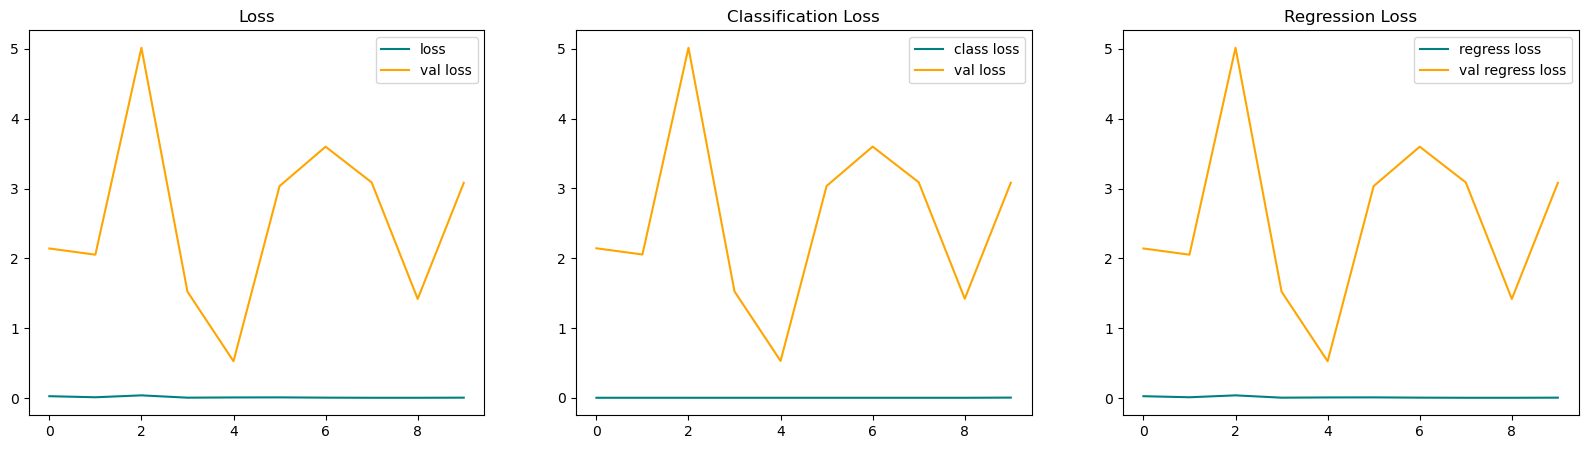

In [151]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['total_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_total_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

## 11. Make Prediction

##### 11.1 Make Predictions on Test Set

In [152]:
test_data = test.as_numpy_iterator()

In [153]:
test_sample = test_data.next()

In [154]:
yhat=facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 225ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


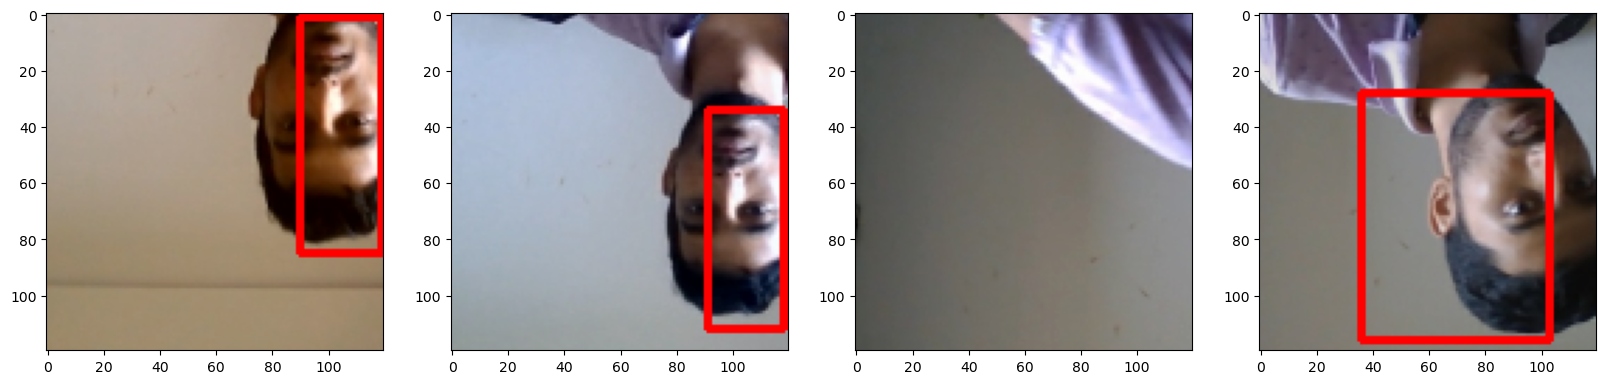

In [157]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

##### 11.2 Save the model

In [158]:
from tensorflow.keras.models import load_model


In [159]:
facetracker.save('facetracker.h5')

C:\Users\Adarsh\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 12. Real time face detection

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 67ms/step
